<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Augmentation/Analysis" data-toc-modified-id="Data-Augmentation/Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Augmentation/Analysis</a></span></li><li><span><a href="#Dataloader-creation-and-test" data-toc-modified-id="Dataloader-creation-and-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataloader creation and test</a></span></li><li><span><a href="#Model-creation" data-toc-modified-id="Model-creation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model creation</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Training</a></span><ul class="toc-item"><li><span><a href="#Model-Testing" data-toc-modified-id="Model-Testing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model Testing</a></span></li></ul></li></ul></div>

**GET DATA**

Summary of this notebook: ...

Definition of Done: ...

# Imports


In [13]:
import pickle
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("/home/satyarth934/code/FDL_2020/training_scripts")
import import_modules
import utils


In [14]:
DATA_PATH = "/home/satyarth934/data/nasa_impact/hurricanes/*/*"
dims = (448,448,3)

In [15]:
img_paths = glob.glob(DATA_PATH)
print(len(img_paths))

13117


In [16]:
def windSpeed(str):    
    file_name = str.split("/")[-1]
    wind_speed = int(file_name.split(".")[0].split("_")[-1].strip("kts"))
    return wind_speed

In [17]:
ws_dict = {}
for img_path in img_paths:
    ws = windSpeed(img_path)
    if ws not in ws_dict:
        ws_dict[ws] = 1
    else:
        ws_dict[ws] += 1

from collections import OrderedDict
ws_dict = OrderedDict(sorted(ws_dict.items()))

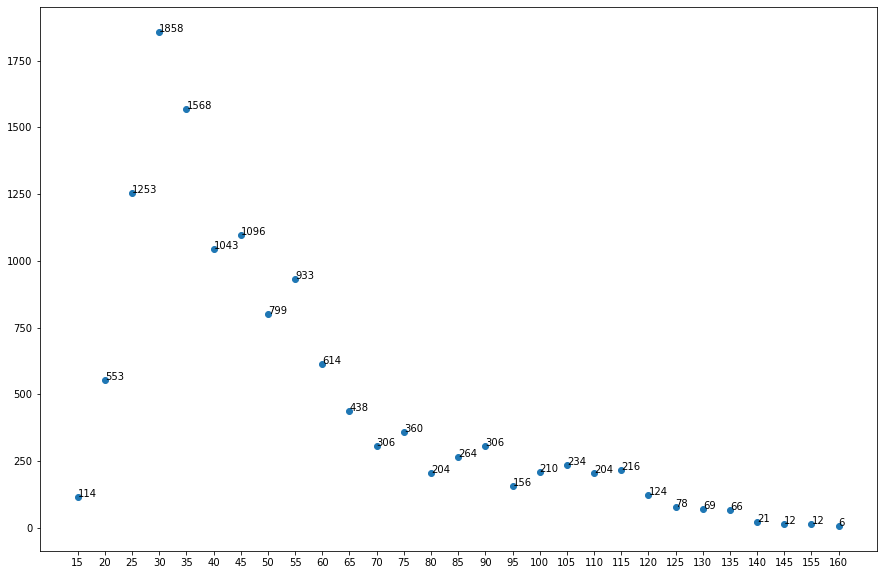

In [48]:
xaxis = np.arange(1, len(ws_dict)+1)
xlabels = np.array(list(ws_dict.keys()))

plt.figure(figsize=(15, 10))
plt.scatter(xaxis, ws_dict.values())
plt.xticks(ticks=xaxis, labels=xlabels)

for i, txt in enumerate(list(ws_dict.values())):
    plt.annotate(txt, (xaxis[i], list(ws_dict.values())[i]))

plt.savefig("num_imgs_per_windspeed.png")
plt.savefig("num_imgs_per_windspeed.eps")